In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [9]:
X=df.drop(columns=['math score'],axis=0)
y=df['math score']

In [14]:
num__features=X.select_dtypes(exclude="object").columns
cat__features=X.select_dtypes(include="object").columns

In [16]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat__features),
        ("StandardScaler",numeric_transformer,num__features)
    ]
)

In [17]:
x=preprocessor.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [27]:
lin_model=LinearRegression()
lin_model=lin_model.fit(X_train,Y_train)
y_pred=lin_model.predict(X_test)
print("R2 score: ",r2_score(Y_test,y_pred))
print(y_pred.size)

R2 score:  0.8803449074540941
200


Text(0, 0.5, 'y_pred')

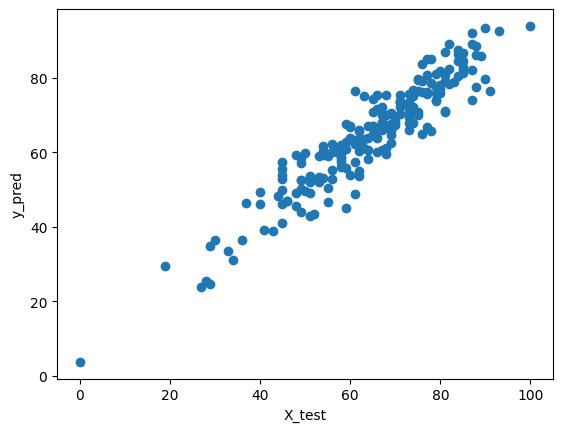

In [31]:
plt.scatter(Y_test,y_pred)
plt.xlabel("X_test")
plt.ylabel("y_pred")
